In [155]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib

In [156]:
#Loading Dataset
df=pd.read_csv(r"C:\Users\Nimisha\Downloads\Placement_Data_Full_Class.csv")
#Displaying first 5 rows
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [157]:
#Displaying last 5 rows
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [158]:
#Statistical Description of Data
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [159]:
#Displaying Some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [160]:
#Displaying Number of Rows and Columns
df.shape

(215, 15)

In [161]:
#Displaying Number of Elements
df.size

3225

In [162]:
#Displaying Datatypes
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [163]:
#Displaying Column names
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [164]:
#Data Cleaning
#Checking for Missing Values
df[df.duplicated()==True]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


In [165]:
#Checking for Missing values
df.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [166]:
#Calculationg sum of missing values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [167]:
#Handling Missing values
df['salary'].fillna(0,inplace=True)

In [168]:
#Checking sum of missing values
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [169]:
#Dropping columns that are not needed
df=df.drop(columns=['sl_no','salary'],axis=1)

In [170]:
#Displaying first 5 rows
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


C:\Users\Nimisha\AppData\Local\Temp\ipykernel_15972\3078140132.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


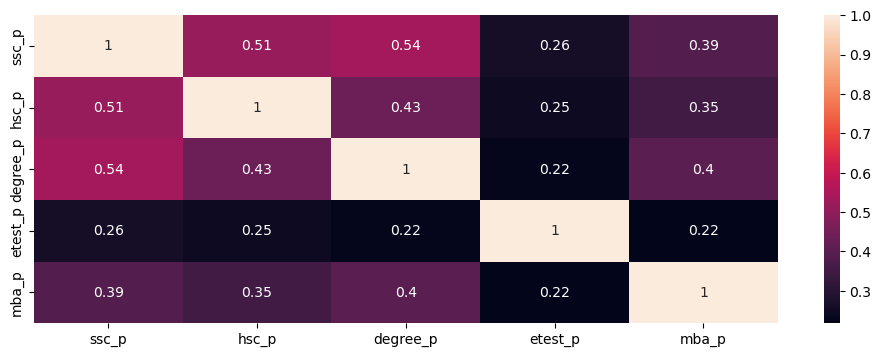

In [171]:
#Plotting heatmap of Correlation Matrix
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [172]:
#Displaying first 2 rows
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


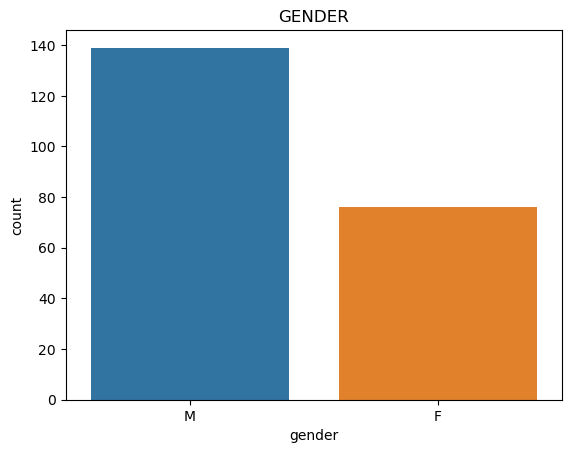

In [173]:
sns.countplot(x='gender',data=df)
plt.title('GENDER')
plt.show()

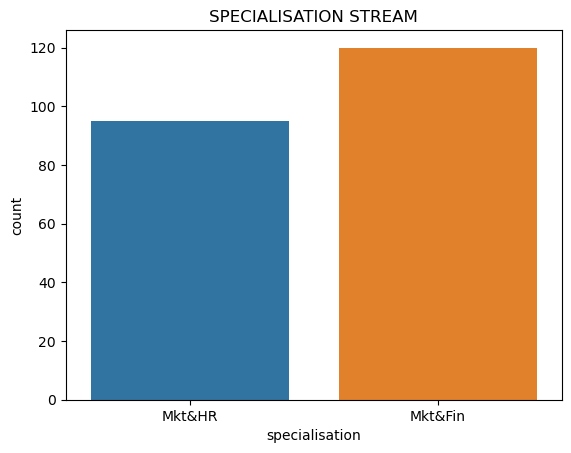

In [174]:
sns.countplot(x='specialisation',data=df)
plt.title('SPECIALISATION STREAM')
plt.show()

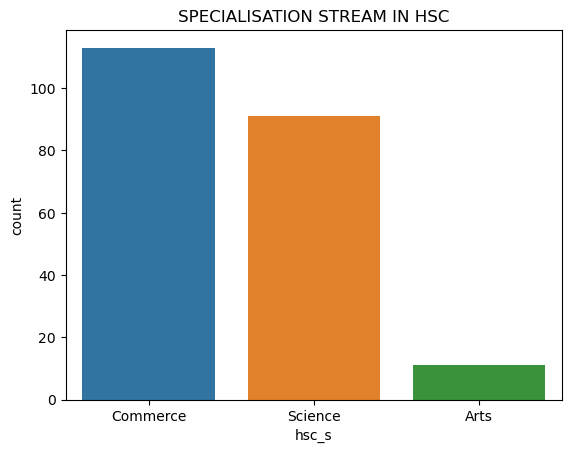

In [175]:
sns.countplot(x='hsc_s',data=df)
plt.title('SPECIALISATION STREAM IN HSC')
plt.show()

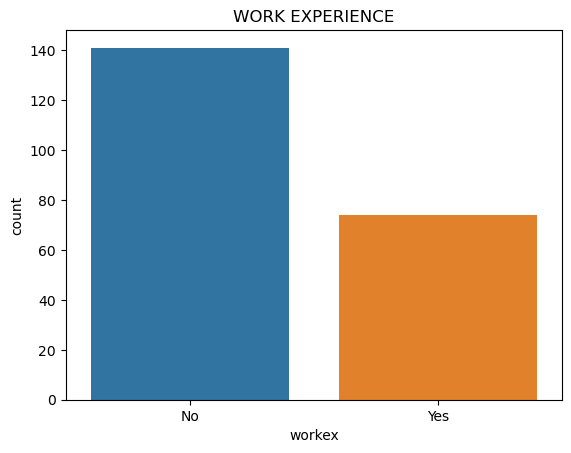

In [176]:
sns.countplot(x='workex',data=df)
plt.title('WORK EXPERIENCE')
plt.show()

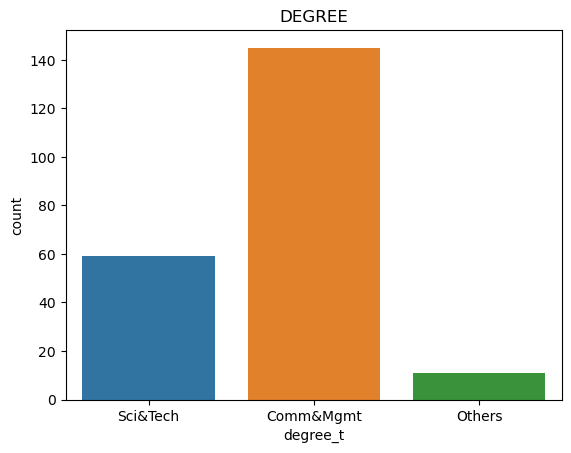

In [177]:
sns.countplot(x='degree_t',data=df)
plt.title('DEGREE')
plt.show()

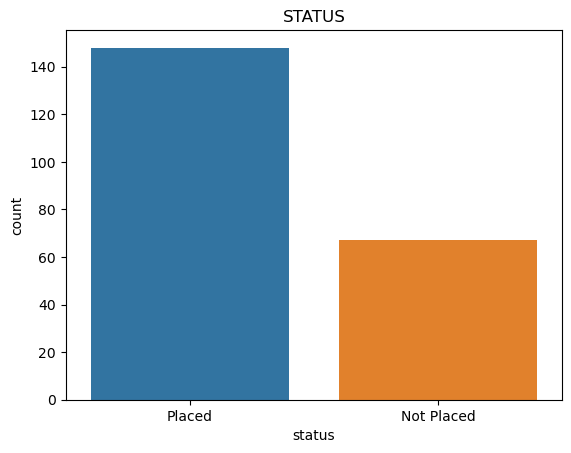

In [178]:
sns.countplot(x='status',data=df)
plt.title('STATUS')
plt.show()

In [179]:
#Modelling
#Encoding
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [180]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [181]:
df['ssc_b']=df['ssc_b'].map({'Central':1,'Others':0})

In [182]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,1,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [183]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [184]:
df['hsc_b']=df['hsc_b'].map({'Central':1,'Others':0})

In [185]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [186]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [187]:
df['hsc_s']=df['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})

In [188]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [189]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [190]:
df['gender']=df['gender'].map({'M':1,'F':0})

In [191]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [192]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [193]:
df['degree_t']=df['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [194]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed


In [195]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [196]:
df['workex']=df['workex'].map({'No':1,'Yes':0})

In [197]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,1,55.0,Mkt&HR,58.80,Placed
1,1,79.33,1,78.33,0,2,77.48,2,0,86.5,Mkt&Fin,66.28,Placed


In [198]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [199]:
df['specialisation']=df['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [200]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,1,55.0,1,58.80,Placed
1,1,79.33,1,78.33,0,2,77.48,2,0,86.5,0,66.28,Placed


In [201]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [202]:
df['status']=df['status'].map({'Placed':1,'Not Placed':0})

In [203]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,1,55.0,1,58.80,1
1,1,79.33,1,78.33,0,2,77.48,2,0,86.5,0,66.28,1


In [204]:
#Storing X(Feature)and Y(Target)
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [205]:
x=df.drop('status',axis=1)

In [206]:
y=df['status']

In [207]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,0,91.00,0,1,58.00,2,1,55.0,1,58.80
1,1,79.33,1,78.33,0,2,77.48,2,0,86.5,0,66.28
2,1,65.00,1,68.00,1,0,64.00,1,1,75.0,0,57.80
3,1,56.00,1,52.00,1,2,52.00,2,1,66.0,1,59.43
4,1,85.80,1,73.60,1,1,73.30,1,1,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,1,77.60,1,1,91.0,0,74.49
211,1,58.00,0,60.00,0,2,72.00,2,1,74.0,0,53.62
212,1,67.00,0,67.00,0,1,73.00,1,0,59.0,0,69.72
213,0,74.00,0,66.00,0,1,58.00,1,1,70.0,1,60.23


In [208]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [209]:
#Splitting into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [210]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 12)
(43, 12)
(172,)
(43,)


In [211]:
#Model Training
lr=LogisticRegression()
lr.fit(x_train,y_train)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

C:\Users\Nimisha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [212]:
#Prediction on Test Data

y_pred_test1=lr.predict(x_test)
y_pred_test2=knn.predict(x_test)
y_pred_test3=dt.predict(x_test)
y_pred_test4=rf.predict(x_test)
y_pred_test5=gb.predict(x_test)


print(y_pred_test1.shape)
print(y_pred_test2.shape)
print(y_pred_test3.shape)
print(y_pred_test4.shape)
print(y_pred_test5.shape)

(43,)
(43,)
(43,)
(43,)
(43,)


In [213]:
#Chceking accuracy score

score1=accuracy_score(y_test,y_pred_test1)
score2=accuracy_score(y_test,y_pred_test2)
score3=accuracy_score(y_test,y_pred_test3)
score4=accuracy_score(y_test,y_pred_test4)
score5=accuracy_score(y_test,y_pred_test5)

print(score1)
print(score2)
print(score3)
print(score4)
print(score5)

0.8837209302325582
0.7906976744186046
0.8372093023255814
0.813953488372093
0.813953488372093


In [214]:
#Data Visualisation of accuracy score
new_df=pd.DataFrame({'Models':['LR',
                               'KNC',
                               'DTC',
                               'RFC',
                               'GBC'],
             'Accuracy_Score':[score1*100,
                               score2*100,
                               score3*100,
                               score4*100,
                               score5*100]}
        )
new_df

,Models,Accuracy_Score
0,LR,88.372093
1,KNC,79.069767
2,DTC,83.720930
3,RFC,81.395349
4,GBC,81.395349


<Axes: xlabel='Models', ylabel='Accuracy_Score'>

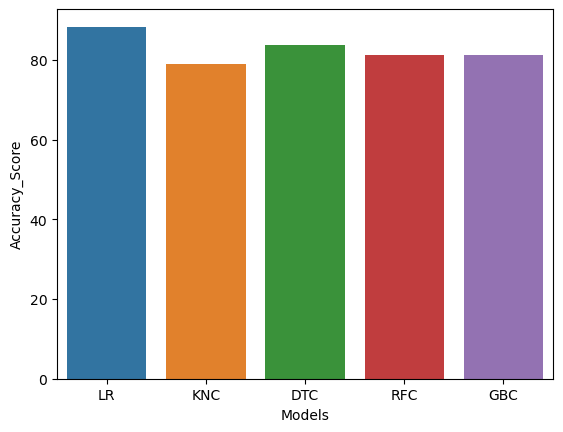

In [215]:
sns.barplot(x=new_df['Models'],y=new_df['Accuracy_Score'])

In [216]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,1,58.00,2,1,55.0,1,58.80,1
1,1,79.33,1,78.33,0,2,77.48,2,0,86.5,0,66.28,1


In [217]:
#Prediction
new_data=pd.DataFrame({'gender':0,'ssc_p':67.0,'ssc_b':0,'hsc_p':91.0,'hsc_b':0,'hsc_s':1,'degree_p':58.0,'degree_t':2,'workex':
                      1,'etest_p':55.0,'specialisation':1,'mba_p':58.8},index=[0])

In [218]:
lr=LogisticRegression()
lr.fit(x,y)

C:\Users\Nimisha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
p=lr.predict(new_data)
#Returning Probability
probability=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You Will be placed with the probability of {probability[0][1]: .2f}")
else:
    print('Not Placed')

Placed
You Will be placed with the probability of  0.96


In [220]:
#Probabiltity of Not Placed and Placed
probability

array([[0.03992329, 0.96007671]])

In [221]:
#Saving the model
joblib.dump(lr,"Campus Placement")

['Campus Placement']

In [222]:
#Loading the Model
a=joblib.load('Campus Placement')

In [223]:
a

LogisticRegression()

In [224]:
#Performing Prediction on Saved Model
a.predict(new_data)

array([1], dtype=int64)